In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
1502/2224

0.6753597122302158

67.5% passengers died in the Titanic disaster.

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [4]:
# Read the test and train datasets

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:

train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lines, Miss. Mary Conover",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can see that 38.4% people have survived in the train dataset, which is slightly more than the overall survival rate. <br>
The median age is 28 years. <br>
The median fare is 14.45 Dollars while the mean fare is 32.2 Dollars, which indicates the distribution of fare is skewed towards the right. 

In [8]:
train.shape

(891, 12)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Sage, Mrs. John (Annie Bullen)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [11]:
test.shape

(418, 11)

We have missing values in both the train and test datasets. So, whatever operation we apply to our train data, we have to apply it to the test data too.

In [12]:
# Missing value percentage in train data

100*train.isnull().sum()/train.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin has 77.1% values missing. So, it's better to remove this column.

In [13]:
# Removing Cabin variable

train.drop(['Cabin'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# Removing Cabin variable from test 

test.drop(['Cabin'], axis = 1, inplace = True)

Embarked variable has 0.22% rows as missing. We can remove these rows.

In [15]:
# Removing rows where Embarked variable is missing

train = train[~train['Embarked'].isnull()].copy()

Age variable has 19.9% rows as missing. We can impute these rows. But, let's look at the variable description first.

In [16]:
# Age variable

train['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean is 29.64 years while the median is 28 years. Let's impute the missing rows with the median.

In [17]:
# Imputing age with median (28)

train['Age'].fillna(28, inplace = True)

In [18]:
# Looking at test data again

test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,3
top,NaN,NaN,"Sage, Mrs. John (Annie Bullen)",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN


In [19]:
# Imputing missing row in Fare with median

test['Fare'].fillna(14.4542, inplace = True)

In [20]:
# Imputing missing rows in Age with median

test['Age'].fillna(27, inplace = True)

In [21]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,418.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,3
top,NaN,NaN,"Sage, Mrs. John (Annie Bullen)",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,270
mean,1100.500000,2.265550,NaN,NaN,29.599282,0.447368,0.392344,NaN,35.576535,NaN
std,120.810458,0.841838,NaN,NaN,12.703770,0.896760,0.981429,NaN,55.850103,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.471875,NaN


## Univariate Analysis

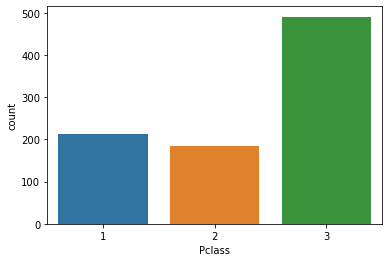

In [22]:
# Ticket class

sns.countplot(train['Pclass'])
plt.show()

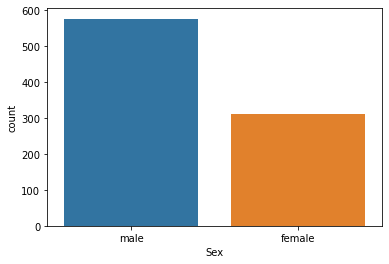

In [23]:
# Sex

sns.countplot(train['Sex'])
plt.show()

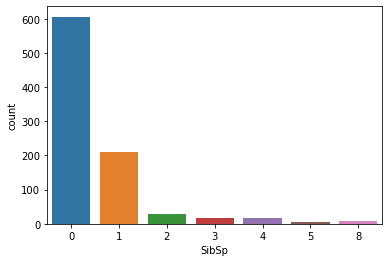

In [24]:
# Siblings/spouses

sns.countplot(train['SibSp'])
plt.show()

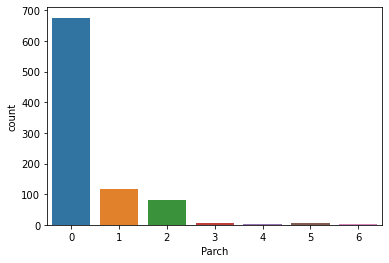

In [25]:
# Parents/Children

sns.countplot(train['Parch'])
plt.show()

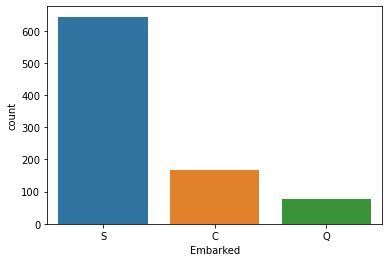

In [26]:
# Cabin

sns.countplot(train['Embarked'])
plt.show()

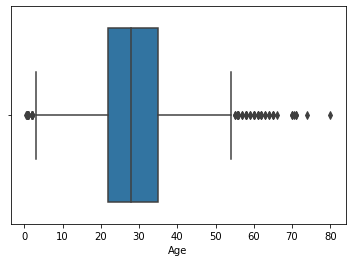

In [27]:
# Boxplot of age

sns.boxplot(train['Age'])
plt.show()

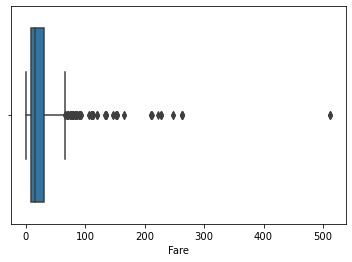

In [28]:
# Boxplot of fare

sns.boxplot(train['Fare'])
plt.show()

In [29]:
# Removing outlier

train = train[train['Fare'] < 400]

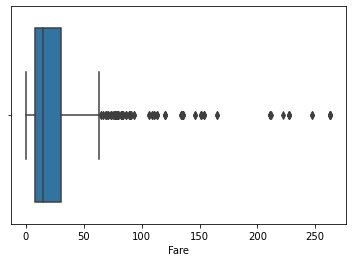

In [30]:
# Boxplot of fare

sns.boxplot(train['Fare'])
plt.show()

In [31]:
# Removing Name and PassengerId variable from train and test

train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test_id = test['PassengerId']
test.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [32]:
# Encoding Pclass

train['Pclass'] = train['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
test['Pclass'] = test['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

In [33]:
# Creating dummy variables for train data

dummy_var = pd.get_dummies(train[['Pclass', 'Sex', 'Embarked']], drop_first = True)

train = pd.concat([train, dummy_var], axis = 1)

In [34]:
# Creating dummy variables for test data

dummy_var = pd.get_dummies(test[['Pclass', 'Sex', 'Embarked']], drop_first = True)

test = pd.concat([test, dummy_var], axis = 1)

In [35]:
y_train = train['Survived']
X_train = train.drop(['Survived'], axis = 1)

In [36]:
X_train.drop(['Pclass', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace = True)
test.drop(['Pclass', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# Scaling train

scaler = StandardScaler()

X_train[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X_train[['Age', 'SibSp', 'Parch', 'Fare']])

In [39]:
test[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(test[['Age', 'SibSp', 'Parch', 'Fare']])

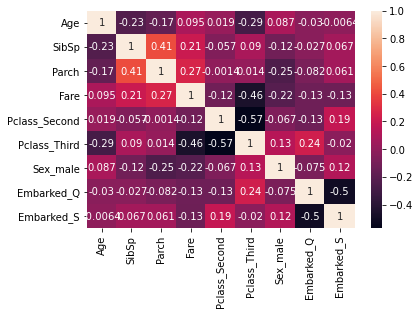

In [40]:
# Correlation matrix

sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [41]:
import statsmodels.api as sm

In [42]:
logm0 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  886
Model:                            GLM   Df Residuals:                      876
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.33
Date:                Fri, 11 Dec 2020   Deviance:                       782.67
Time:                        06:28:31   Pearson chi2:                     906.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8853      0.328      8.798      0.000       2.243       3.528
Age              -0.5083      0.102     -4.966      0.000      -0.709      -0.308
SibSp            -0.3342      0.121     -2.760      0.006      -0.572      -0.097
Parch            -0.0565      0.097     -0.582      0.561      -0.247       0.134
Fare             -0.0052      0.132     -0.039      0.969      -0.264       0.254
Pclass_Second    -1.0164      0.312     -3.262      0.001      -1.627      -0.406
Pclass_Third     -2.2756      0.320     -7.108      0.000      -2.903      -1.648
Sex_male         -2.7219      0.201    -13.519      0.000      -3.117      -2.327
Embarked_Q       -0.0538      0.381     -0.141      0.888      -0.801       0.694
Embarked_S       -0.4418      0.239     -1.847      0.065      -0.911       0.027
=================================================================================
"""

In [43]:
# Removing columns with high p-value and training the model again

col = X_train.columns
col



Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Second', 'Pclass_Third',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
col = col.drop('Fare', 1)
col

Index(['Age', 'SibSp', 'Parch', 'Pclass_Second', 'Pclass_Third', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [45]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  886
Model:                            GLM   Df Residuals:                      877
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.33
Date:                Fri, 11 Dec 2020   Deviance:                       782.67
Time:                        06:28:55   Pearson chi2:                     906.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8790      0.286     10.060      0.000       2.318       3.440
Age              -0.5080      0.102     -4.978      0.000      -0.708      -0.308
SibSp            -0.3351      0.119     -2.818      0.005      -0.568      -0.102
Parch            -0.0575      0.094     -0.613      0.540      -0.241       0.126
Pclass_Second    -1.0103      0.270     -3.741      0.000      -1.540      -0.481
Pclass_Third     -2.2680      0.255     -8.901      0.000      -2.767      -1.769
Sex_male         -2.7213      0.201    -13.549      0.000      -3.115      -2.328
Embarked_Q       -0.0532      0.381     -0.140      0.889      -0.800       0.694
Embarked_S       -0.4407      0.238     -1.855      0.064      -0.906       0.025
=================================================================================
"""

In [46]:
col = col.drop('Embarked_Q', 1)
col

Index(['Age', 'SibSp', 'Parch', 'Pclass_Second', 'Pclass_Third', 'Sex_male',
       'Embarked_S'],
      dtype='object')

In [47]:
logm2 = sm.GLM(y_train, (sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  886
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.34
Date:                Fri, 11 Dec 2020   Deviance:                       782.69
Time:                        06:29:16   Pearson chi2:                     907.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8662      0.271     10.582      0.000       2.335       3.397
Age              -0.5088      0.102     -4.995      0.000      -0.708      -0.309
SibSp            -0.3350      0.119     -2.819      0.005      -0.568      -0.102
Parch            -0.0561      0.093     -0.602      0.547      -0.239       0.127
Pclass_Second    -1.0150      0.268     -3.788      0.000      -1.540      -0.490
Pclass_Third     -2.2778      0.245     -9.300      0.000      -2.758      -1.798
Sex_male         -2.7183      0.200    -13.620      0.000      -3.110      -2.327
Embarked_S       -0.4240      0.205     -2.065      0.039      -0.826      -0.022
=================================================================================
"""

In [48]:
col = col.drop('Parch', 1)
col

Index(['Age', 'SibSp', 'Pclass_Second', 'Pclass_Third', 'Sex_male',
       'Embarked_S'],
      dtype='object')

In [49]:
logm3 = sm.GLM(y_train, (sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  886
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.53
Date:                Fri, 11 Dec 2020   Deviance:                       783.05
Time:                        06:29:32   Pearson chi2:                     910.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8509      0.269     10.591      0.000       2.323       3.378
Age              -0.5055      0.102     -4.975      0.000      -0.705      -0.306
SibSp            -0.3564      0.114     -3.128      0.002      -0.580      -0.133
Pclass_Second    -1.0122      0.268     -3.778      0.000      -1.537      -0.487
Pclass_Third     -2.2762      0.245     -9.291      0.000      -2.756      -1.796
Sex_male         -2.6931      0.195    -13.832      0.000      -3.075      -2.311
Embarked_S       -0.4296      0.205     -2.096      0.036      -0.831      -0.028
=================================================================================
"""

In [50]:
res = logm3.fit()

In [51]:
y_train_pred = res.predict((sm.add_constant(X_train[col]))).values.reshape(-1)

In [52]:
y_train_pred[:10]

array([0.08186557, 0.91366622, 0.60894724, 0.88557752, 0.06911841,
       0.13029049, 0.2566987 , 0.09240782, 0.59964532, 0.9072613 ])

In [53]:
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred})

In [54]:
y_train_pred_final['Predicted'] = y_train_pred_final['Churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [55]:
from sklearn import metrics

In [56]:
print(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted']))

0.801354401805869


In [57]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [58]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

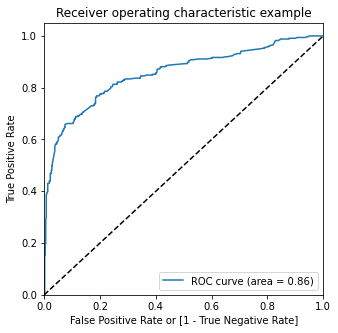

In [59]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [60]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081866,0,1,0,0,0,0,0,0,0,0,0
1,1,0.913666,1,1,1,1,1,1,1,1,1,1,1
2,1,0.608947,1,1,1,1,1,1,1,1,0,0,0
3,1,0.885578,1,1,1,1,1,1,1,1,1,1,0
4,0,0.069118,0,1,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380361  1.000000  0.000000
0.1   0.1  0.560948  0.919881  0.340619
0.2   0.2  0.706546  0.848665  0.619308
0.3   0.3  0.768623  0.821958  0.735883
0.4   0.4  0.794582  0.762611  0.814208
0.5   0.5  0.801354  0.697329  0.865209
0.6   0.6  0.819413  0.646884  0.925319
0.7   0.7  0.792325  0.501484  0.970856
0.8   0.8  0.761851  0.385757  0.992714
0.9   0.9  0.694131  0.204748  0.994536


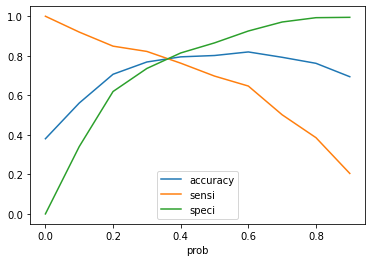

In [63]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [64]:
y_train_pred_final['Predicted_rev'] = y_train_pred_final['Churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

In [65]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted_rev)

0.8194130925507901

In [66]:
y_test_pred = res.predict((sm.add_constant(test[col]))).values.reshape(-1)

In [67]:
y_test_pred

array([0.10421416, 0.33253975, 0.12378737, 0.0920299 , 0.5685212 ,
       0.14388667, 0.67192169, 0.21267647, 0.76561403, 0.06291207,
       0.0920299 , 0.32038883, 0.92505939, 0.06018684, 0.82913694,
       0.86894109, 0.28767569, 0.16436788, 0.52031683, 0.53329194,
       0.26989237, 0.16954313, 0.93584999, 0.65704697, 0.87763561,
       0.02912755, 0.9645776 , 0.15650925, 0.36413136, 0.07551944,
       0.09599783, 0.17454685, 0.46204872, 0.52031683, 0.49434323,
       0.17816533, 0.59964532, 0.65416487, 0.0987408 , 0.0920299 ,
       0.08896724, 0.4967864 , 0.05552894, 0.82509957, 0.83987875,
       0.0987408 , 0.42960155, 0.13476238, 0.86129456, 0.51346496,
       0.44551098, 0.35537698, 0.78498429, 0.8420157 , 0.35537698,
       0.07664247, 0.06911841, 0.0987408 , 0.06838454, 0.94046013,
       0.13009923, 0.22800659, 0.12575959, 0.73654785, 0.578355  ,
       0.84130793, 0.76561403, 0.31197823, 0.56491792, 0.74531924,
       0.72117535, 0.11347888, 0.58083066, 0.58865302, 0.94260

In [68]:
test['Predicted'] = pd.DataFrame({'Churn_p': y_test_pred})['Churn_p'].map(lambda x: 1 if x > 0.6 else 0)

In [69]:
test['PassengerId'] = test_id

In [ ]:
test.head()